# For NCAR demonstration


In [11]:
##import CWB developed module
import cwbplot.IO_tools as IO

In [12]:
##import python utility module 
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pyproj
import warnings
warnings.filterwarnings('ignore')

# MSC satellite data 

In [13]:
#1. Given MSC data file path, no need for untar.
msc_base_dir = '/home/disk/monsoon/precip/bin/NCAR/DATA/MSC_SAT'
file_twn=msc_base_dir+'/2022-03-21_0900.TAIWAN_NWP.VIS.1350.tar.gz'
file_asia=msc_base_dir+'/2022-03-21_0900.EASTASIA_NWP.IR1.2750.tar.gz'
#2 Using MSC_READ function and get data object, the info shows data contain albedo(alb), 
#   grayscale value(cnt), and brightnes temperature(btp)
taiwan_obj=IO.MSC_READ(file_twn)
asia_obj = IO.MSC_READ(file_asia)
#3 all data info are in this structured object

<TarInfo '2022-03-21_0900.TAIWAN_NWP.VIS.1350.alb' at 0x14793704d368>
<TarInfo '2022-03-21_0900.TAIWAN_NWP.VIS.1350.Cnt' at 0x14793704da70>
<TarInfo '2022-03-21_0900.EASTASIA_NWP.IR1.2750.btp' at 0x14793704da70>
<TarInfo '2022-03-21_0900.EASTASIA_NWP.IR1.2750.Cnt' at 0x14793704d368>


In [ ]:
## Projection for TAWINAN AREA - NOT WORKING!!!!
bm_twn = Basemap(projection='tmerc', resolution='i',
                lat_0=23.7,lon_0=121.0,
                llcrnrlon=116.1417,llcrnrlat=19.0295,
                urcrnrlon=126.2109,urcrnrlat=28.2065)

In [ ]:
bm_twn.pcolormesh(taiwan_obj.lon ,taiwan_obj.lat,taiwan_obj.data['VIS_ALB'],cmap='binary_r',latlon=True)
bm_twn.drawcoastlines(color='w')
plt.colorbar()
plt.title('TAIWAN AREA ALEBDO for VIS BAND AT 0800 LST')

In [14]:
## Projection for EASTASIA
bm_asia = Basemap(projection='lcc', resolution='i',
                  lat_1=30.,lat_2=60.,lat_0=0,lon_0=128.5,
                  llcrnrlon=102.111,llcrnrlat=-1.503,
                  urcrnrlon=155.270,urcrnrlat= 48.589)


Text(0.5, 1.0, 'EASTASIA AREA Bnt for IR BAND AT 0800 LST')

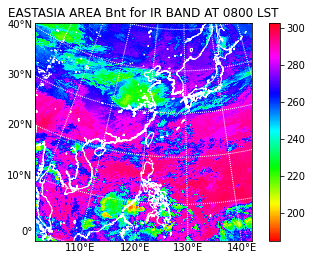

In [15]:
bm_asia.pcolormesh(asia_obj.lon ,asia_obj.lat,asia_obj.data['IR1_BTP'],cmap='hsv',latlon=True)
bm_asia.drawcoastlines(color='w') 
bm_asia.drawparallels(np.arange(0,60,10) , labels=[1,0,0,0] , fontsize=10,color='w')
bm_asia.drawmeridians(np.arange(80,180,10),labels=[0,0,0,1],fontsize=10,color='w')
plt.colorbar()
plt.title('EASTASIA AREA Bnt for IR BAND AT 0800 LST')
#plt.savefig()

# Max combine Radar Reflectivity 

In [ ]:
# NOT WORKING BECAUSE bm_twn not created above
compress_base_dir = '/home/disk/monsoon/precip/bin/NCAR/DATA/RADAR'
compress_dat = compress_base_dir+'/COMPREF.20220321.0000.gz'
out=IO.COMPREF_READ(compress_dat)
bm_twn.drawcoastlines()
bm_twn.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()
print(out)

# Numerical model data (DMSKEY)

In [16]:
def DMSXYDIM(WXX):
    ''' function for return xdim,ydim at once
        EX: xdim,ydim=DMSXYDIM("WF02")
    '''
    if WXX=='WD01': xdim,ydim=661,385
    if WXX=='WD02': xdim,ydim=1158,673
    if WXX=='WF02': xdim,ydim=263,303
    if WXX=='WE01': xdim,ydim=450,450
    return xdim,ydim

def DMSTAIL(WXX):
    ''' function for return tail of DMSKEY in string format
    '''
    domain2grid={"WD01":"0254485" ,"WD02":"0779334" ,"WF02":"0079689","WD03":"0729136","WE01":"0202500"}
    return domain2grid[WXX]

file_path='/home/disk/monsoon/precip/bin/NCAR/DATA/MODEL/2022032100000012/'
#### 20222032100 means model initial at 2022/03/21 00 UTC
#### 0000012 means forecast time is 12 hour
dms_lat = np.fromfile(file_path+'X00LATWD02H0779334',dtype='>d',count=-1,sep="") #LAT
dms_lon = np.fromfile(file_path+'X00LONWD02H0779334',dtype='>d',count=-1,sep="") #LON
dms_u = np.fromfile(file_path+'850200WD02H0779334',dtype='>d',count=-1,sep="")
dms_v = np.fromfile(file_path+'850210WD02H0779334',dtype='>d',count=-1,sep="")
dms_rh = np.fromfile(file_path+'850510WD02H0779334',dtype='>d',count=-1,sep="")
dms_t = np.fromfile(file_path+'850100WD02H0779334',dtype='>d',count=-1,sep="")
xdim,ydim=DMSXYDIM("WD02")
data_lat= np.float32(np.reshape(dms_lat, (xdim,ydim), order='F'))
data_lon= np.float32(np.reshape(dms_lon, (xdim,ydim), order='F'))
data_u= np.float32(np.reshape(dms_u, (xdim,ydim), order='F'))
data_v= np.float32(np.reshape(dms_v, (xdim,ydim), order='F'))
data_rh= np.float32(np.reshape(dms_rh, (xdim,ydim), order='F'))
data_t= np.float32(np.reshape(dms_t, (xdim,ydim), order='F'))

In [17]:
# DOESN'T WORK 
bm = Basemap(projection='tmerc',resolution='i', fix_aspect=True, llcrnrlon=110,
             llcrnrlat=15, urcrnrlon=130,urcrnrlat=32,lat_0=45,lon_0=120)
bm.drawcoastlines()
bm.contourf(data_lon,data_lat,data_t,latlon=True)
bm.quiver(data_lon[::10,::10],data_lat[::10,::10],data_u[::10,::10],data_v[::10,::10]
          ,scale=500,latlon=True)
plt.colorbar()
plt.title('Numerical Model result of 12 hr forecast from 2022/3/21 00 UTC \n Temp vs. UV-wind at 850hPa')

RuntimeError: b'major axis or radius = 0 or not given'

# Reference DMSKEY